In [4]:
import matplotlib.pyplot as plt
import matplotlib as mpl
import pandas as pd
import numpy as np
from mpl_toolkits.axes_grid1.axes_divider import make_axes_locatable
from mpl_toolkits.mplot3d import Axes3D

In [5]:
#read the excel file using pandas
df = pd.read_excel('contour.xlsx')
df

,X,Y,Z,W
0,0.666667,0.000000,15.000000,0.000000
1,0.666667,0.000000,14.000000,0.000048
2,0.666667,0.000000,13.000000,0.000067
3,0.666667,0.000000,12.000000,0.000081
4,0.666667,0.000000,11.000000,0.000092
...,...,...,...,...
411271,-210.942803,-22.904074,-12.966102,0.000021
411272,-210.942803,-22.904074,-13.474576,0.000019
411273,-210.942803,-22.904074,-13.983051,0.000015
411274,-210.942803,-22.904074,-14.491525,0.000011


In [7]:
#getting the shape
df.shape

(411276, 4)

In [8]:
#for seperating of zones from the total dataset
#zone1 = df.iloc[:10000]  #iloc[first row location of this zone(here for the first row this is nothing) : last row location of the zone(here for example this is 10000)]
#that mean this zone 1 is from 0 row to 9999 (1 less than the last location)

#zone2 = [10000:20000] #siilarly this zone consists from 10000 to 20000 rows 
#.....
#.....
#.....
#you can similarly seperate your zones in in the same way. You just have to know which zone starts from which number of row and ends in which number of row

In [9]:
#lets see the columns
df.columns #if you want now to look at the columns of any zone(described earlier) just replace df with zone name. each
#zone is now a seperate dataframe. Like zone1.columns

Index(['X', 'Y', 'Z', 'W'], dtype='object')

In [12]:
#Get the size of X column
df['X'].shape
#this is 1D array

(411276,)

In [13]:
#get the size of Y column
df['Y'].shape
#this is also 1D array

(411276,)

In [14]:
#create a rectangle for the X, Y points using numpy meshgrid. #remember numpy is imported here as np and pandas as pd
X,Y = np.meshgrid(df['X'].iloc[:1000], df['Y'].iloc[:1000]) #here I assume the zone 1 consist of first 1000 rows of the
#dataframe(I haven't seperated the df as zones. If I did I would replace df['X'].iloc[:1000] with zone1/zone2. ) so to create
#a rectangle of every point of X and Y for the first 1000 rows 

In [16]:
#now lets check out the size of X and Y
X.shape, Y.shape
#see they both are now 2D array. The shape is 1000 by 1000 because I selected 1000 from both of them to create the grid

((1000, 1000), (1000, 1000))

In [17]:
#now create a function that returns Z. Z is a function of X and Y
def F(X,Y):
    return np.sqrt(X**2+Y**2) #I don't know the exact relation between them so I use the root of sum of square of X and Y

Z = F(X,Y)

In [19]:
#lets check the shape of Z
Z.shape
#the shape of Z is similar to X and Y

(1000, 1000)

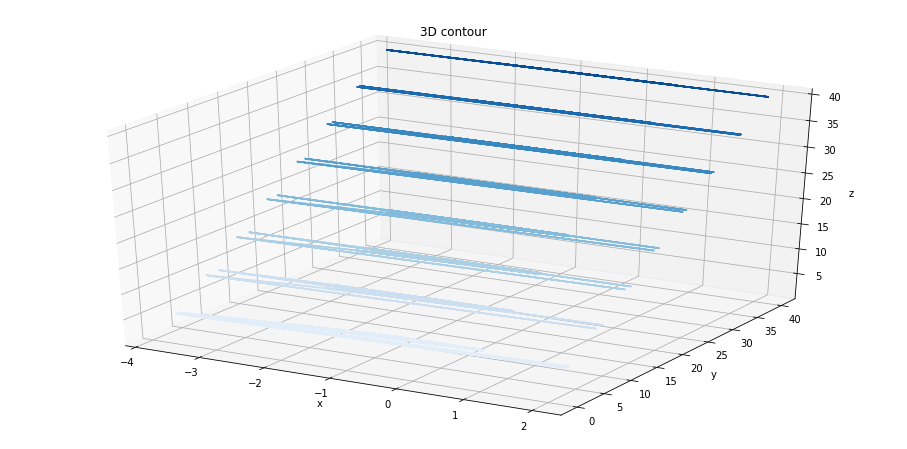

In [24]:
#now plot the contour 3D plot

#first define the figure
fig = plt.figure(figsize=(16,8))
#define the axes on the figure
ax = plt.axes(projection='3d')
#plot the contour3D on the axes
ax.contour3D(X, Y, Z, cmap='Blues') #you can change the cmap(color of the plot) as you want. First insert any random value
#say xyz into the cmap parameter. This will give you an error also you will get all the possible values to input. 
#then select the one you like and input this on the cmap parameter again
#set the lable name
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('z')
#set the title
ax.set_title('3D contour')
plt.show()